<a href="https://colab.research.google.com/github/Abeer-Rahman/Deep-Learning-With-Python/blob/main/Copy_of_chapter09_part01_image_segmentation_i.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Advanced deep learning for computer vision

## Three essential computer vision tasks

i. Image Classification

ii. Image Segmentation

iii.Object Detection


**Image Segmentation**:

Goal is to partition an image into different areas. Each area represents a category





## An image segmentation example


* We’ll be looking once again at images of cats and dogs, and this time we’ll learn how to tell apart the main subject and its background.

* We’ll work with the Oxford-IIIT Pets dataset

* A segmentation mask is the image-segmentation equivalent of a label

* Image segmentation mask is an image the same size as the input image

* Each mask has a single color channel where each integer value corresponds to the class of corresponding pixel in the input value.

* In our case, the pixels of our segmentation masks can take one of three integer values:

                1(foregorund)
                2(background)
                3(contour)








In [ ]:
#downloading and uncompressing our dataset, using the wget and tar shell utilities:
#downloading the datasat
!wget http://www.robots.ox.ac.uk/~vgg/data/pets/data/images.tar.gz
!wget http://www.robots.ox.ac.uk/~vgg/data/pets/data/annotations.tar.gz
#extracting the files
!tar -xf images.tar.gz
!tar -xf annotations.tar.gz
#A dataset of 37 category pet with roughly 200 images for each class.
#The images have a large variations in scale, pose and lighting. All images have an
#associated ground truth annotation of breed, head ROI, and pixel

--2024-07-20 20:24:39--  http://www.robots.ox.ac.uk/~vgg/data/pets/data/images.tar.gz
Resolving www.robots.ox.ac.uk (www.robots.ox.ac.uk)... 129.67.94.2
Connecting to www.robots.ox.ac.uk (www.robots.ox.ac.uk)|129.67.94.2|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://www.robots.ox.ac.uk/~vgg/data/pets/data/images.tar.gz [following]
--2024-07-20 20:24:39--  https://www.robots.ox.ac.uk/~vgg/data/pets/data/images.tar.gz
Connecting to www.robots.ox.ac.uk (www.robots.ox.ac.uk)|129.67.94.2|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://thor.robots.ox.ac.uk/pets/images.tar.gz [following]
--2024-07-20 20:24:39--  https://thor.robots.ox.ac.uk/pets/images.tar.gz
Resolving thor.robots.ox.ac.uk (thor.robots.ox.ac.uk)... 129.67.95.98
Connecting to thor.robots.ox.ac.uk (thor.robots.ox.ac.uk)|129.67.95.98|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 791918971 (755M) [app

In [ ]:
#checking the directory structure
!ls images

!ls annotations


Abyssinian_100.jpg		   keeshond_186.jpg
Abyssinian_100.mat		   keeshond_187.jpg
Abyssinian_101.jpg		   keeshond_188.jpg
Abyssinian_101.mat		   keeshond_189.jpg
Abyssinian_102.jpg		   keeshond_18.jpg
Abyssinian_102.mat		   keeshond_190.jpg
Abyssinian_103.jpg		   keeshond_191.jpg
Abyssinian_104.jpg		   keeshond_192.jpg
Abyssinian_105.jpg		   keeshond_193.jpg
Abyssinian_106.jpg		   keeshond_194.jpg
Abyssinian_107.jpg		   keeshond_195.jpg
Abyssinian_108.jpg		   keeshond_196.jpg
Abyssinian_109.jpg		   keeshond_197.jpg
Abyssinian_10.jpg		   keeshond_198.jpg
Abyssinian_110.jpg		   keeshond_199.jpg
Abyssinian_111.jpg		   keeshond_19.jpg
Abyssinian_112.jpg		   keeshond_1.jpg
Abyssinian_113.jpg		   keeshond_200.jpg
Abyssinian_114.jpg		   keeshond_20.jpg
Abyssinian_115.jpg		   keeshond_21.jpg
Abyssinian_116.jpg		   keeshond_22.jpg
Abyssinian_117.jpg		   keeshond_23.jpg
Abyssinian_118.jpg		   keeshond_24.jpg
Abyssinian_119.jpg		   keeshond_25.jpg
Abyssinian_11.jpg		   keeshond_26.jpg
Abyssinian_12

preparing the list of input file paths, as well as the list of the corresponding mask file paths

In [ ]:
import os
#Scaning the image and annotation/trimaps directories and
#creating the sorted lists of image and annotation file path

input_dir = "images/"
target_dir = "annotations/trimaps/"

input_img_paths = sorted(
    [os.path.join(input_dir, fname)
     for fname in os.listdir(input_dir)
     if fname.endswith(".jpg")])
for i in range(5):
  print(input_img_paths[i])

target_paths = sorted(
    [os.path.join(target_dir, fname)
     for fname in os.listdir(target_dir)
     if fname.endswith(".png") and not fname.startswith(".")])
for i in range(5):
  print(target_paths[i])

print(f"Number of input images: {len(input_img_paths)}")
print(f"Number of target annotations: {len(target_paths)}")

images/Abyssinian_1.jpg
images/Abyssinian_10.jpg
images/Abyssinian_100.jpg
images/Abyssinian_101.jpg
images/Abyssinian_102.jpg
annotations/trimaps/Abyssinian_1.png
annotations/trimaps/Abyssinian_10.png
annotations/trimaps/Abyssinian_100.png
annotations/trimaps/Abyssinian_101.png
annotations/trimaps/Abyssinian_102.png
Number of input images: 7390
Number of target annotations: 7390


##Visualizing one of these inputs and its mask

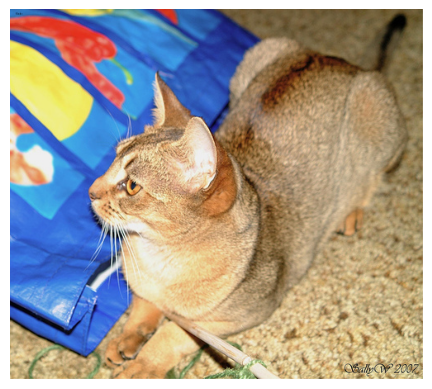

In [ ]:
#visualizing image
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array

plt.axis("off")
plt.imshow(load_img(input_img_paths[9]))

[[[127]
  [127]
  [127]
  ...
  [127]
  [127]
  [127]]

 [[127]
  [127]
  [127]
  ...
  [127]
  [127]
  [127]]

 [[127]
  [127]
  [127]
  ...
  [127]
  [127]
  [127]]

 ...

 [[127]
  [127]
  [127]
  ...
  [127]
  [127]
  [127]]

 [[127]
  [127]
  [127]
  ...
  [127]
  [127]
  [127]]

 [[127]
  [127]
  [127]
  ...
  [127]
  [127]
  [127]]]
(448, 500, 1)


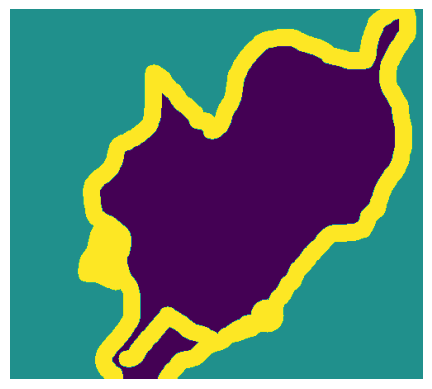

In [ ]:
#Visua;izing the mask
def display_target(target_array):
    """
    The original labels are 1, 2, and 3. We subtract 1 so that the labels range
    from 0 to 2, and then we multiply by 127 so that the labels become 0 (black),
     127 (gray), 254 (near-white)

     """
    normalized_array = (target_array.astype("uint8") - 1) * 127
    print(normalized_array)
    print(normalized_array.shape)
    plt.axis("off")
    plt.imshow(normalized_array[:, :,0]) # 0 means first channel,immage is in grayscale

img = img_to_array(load_img(target_paths[9], color_mode="grayscale"))
display_target(img)

## Visulaizing the original mask



Unique values in the target array: [1. 2. 3.]


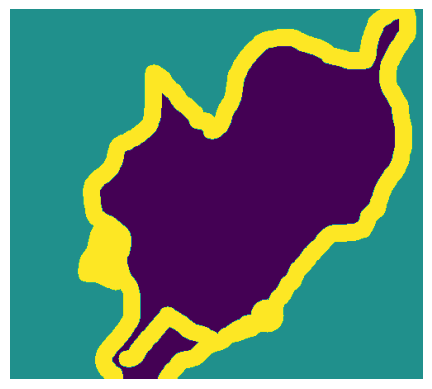

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np

def display_target(target_array):
    """
    Display the target mask with its original values and print unique values.
    """
    # Print unique values in the target array
    unique_values = np.unique(target_array)
    print("Unique values in the target array:", unique_values)

    # Display the mask without normalization
    plt.axis("off")
    plt.imshow(target_array[:, :, 0], cmap='viridis')  # Using viridis for better color differentiation
    plt.show()

# Load the mask
img = img_to_array(load_img(target_paths[9], color_mode="grayscale"))

# Display the target mask and print unique values
display_target(img)


## continue
1.Loading inputs and targets into two Numpy arrays

2.Splittng the arrays into training and validation set

In [ ]:
import numpy as np
import random
#resizing to 200x200
img_size = (200, 200)
#total number of samples in the data
num_imgs = len(input_img_paths)
print(num_imgs)


#shuffle the file path
#we used the same seed(1337) in bith input_img_paths and target_paths
#This will ensure that input paths and target paths remain in the same order
random.Random(1337).shuffle(input_img_paths)
random.Random(1337).shuffle(target_paths)

#functions converting images and targes to array

def path_to_input_image(path):
    return img_to_array(load_img(path, target_size=img_size))

def path_to_target(path):
    img = img_to_array(
        load_img(path, target_size=img_size, color_mode="grayscale"))
    img = img.astype("uint8") - 1
    return img

#intializing the arrays for input images and targets with zeros
input_imgs = np.zeros((num_imgs,) + img_size + (3,), dtype="float32")
print(input_imgs.shape)
print(input_imgs[0])
targets = np.zeros((num_imgs,) + img_size + (1,), dtype="uint8")
print(targets.shape)
print(len(targets[0]))

#converting each images to arrays of 200x200

for i in range(num_imgs):
    input_imgs[i] = path_to_input_image(input_img_paths[i])
    targets[i] = path_to_target(target_paths[i])
print(input_imgs[0])
print(targets[0])
print(input_imgs[0].shape)
print(targets[0].shape)

#spliting the input images for valitation and training
print(len(input_imgs))
num_val_samples = 1000
train_input_imgs = input_imgs[:-num_val_samples]
print(len(train_input_imgs))
train_targets = targets[:-num_val_samples]
val_input_imgs = input_imgs[-num_val_samples:]
print(len(val_input_imgs))
val_targets = targets[-num_val_samples:]

7390
(7390, 200, 200, 3)
[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]]
(7390, 200, 200, 1)
200
[[[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 253.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[252. 252. 252.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [254. 254. 254.]
  [253. 253. 253.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 ...

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]


##Test
seed

In [ ]:
x=[1,2,3,4]
y=[4,0,6,3]

random.Random(1337).shuffle(x)
random.Random(1337).shuffle(y)
print(x)
print(y)



[2, 1, 4, 3]
[0, 4, 3, 6]


#Defining Model

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model(img_size, num_classes):

    inputs = keras.Input(shape=img_size + (3,))
    print(inputs.get_shape())
    #Normalization
    x = layers.Rescaling(1./255)(inputs)

#Encoding the images into smaller feature map
#In case of segmentation spatial location is important
#When we do maxpooling we distroy the loction infromation in within each pooling window
#strided convolutions do a better job at downsampling feature maps while retaining location information

    x = layers.Conv2D(64, 3, strides=2, activation="relu", padding="same")(x)
    x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
    x = layers.Conv2D(128, 3, strides=2, activation="relu", padding="same")(x)
    x = layers.Conv2D(128, 3, activation="relu", padding="same")(x)
    x = layers.Conv2D(256, 3, strides=2, padding="same", activation="relu")(x)
    x = layers.Conv2D(256, 3, activation="relu", padding="same")(x) #feature map of shape (25, 25, 256)

#We want our final output to have the same shape as the target masks, (200, 200, 3).
#Therefore, we need to apply a kind of inverse of the transformations we’ve applied so far
#Transposing backward

    x = layers.Conv2DTranspose(256, 3, activation="relu", padding="same")(x)
    x = layers.Conv2DTranspose(256, 3, activation="relu", padding="same", strides=2)(x)
    x = layers.Conv2DTranspose(128, 3, activation="relu", padding="same")(x)
    x = layers.Conv2DTranspose(128, 3, activation="relu", padding="same", strides=2)(x)
    x = layers.Conv2DTranspose(64, 3, activation="relu", padding="same")(x)
    x = layers.Conv2DTranspose(64, 3, activation="relu", padding="same", strides=2)(x)

    #a per-pixel three-way softmax to classify each output pixel into one of our three categories.

    outputs = layers.Conv2D(num_classes, 3, activation="softmax", padding="same")(x)

    model = keras.Model(inputs, outputs)
    return model

model = get_model(img_size=img_size, num_classes=3)
model.summary()

(None, 200, 200, 3)
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 200, 200, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 200, 200, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 100, 100, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 100, 100, 64)      36928     
                                                                 
 conv2d_2 (Conv2D)           (None, 50, 50, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 50, 50, 128)       147584    
                                                                 
 conv2d_4 (Conv2D)           (None, 25, 2

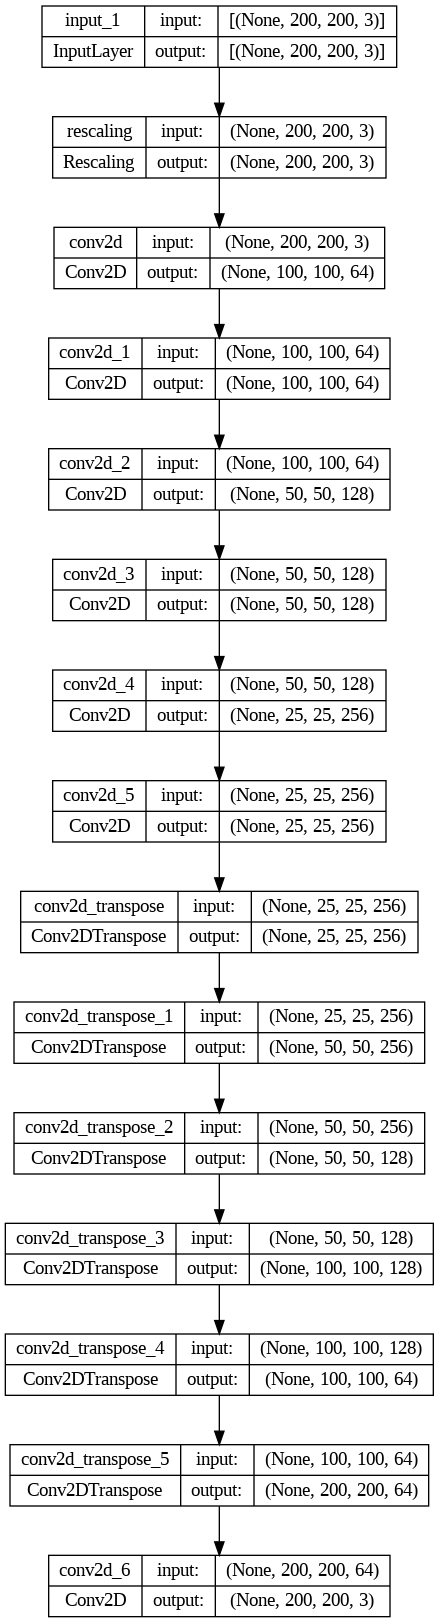

In [ ]:
from keras.utils import plot_model
plot_model(model,show_layer_names=True,show_shapes=True)

In [ ]:
model.compile(optimizer="rmsprop", loss="sparse_categorical_crossentropy")

callbacks = [
    keras.callbacks.ModelCheckpoint("oxford_segmentation.keras",
                                    save_best_only=True)
]

history = model.fit(train_input_imgs, train_targets,
                    epochs=50,
                    callbacks=callbacks,
                    batch_size=64,
                    validation_data=(val_input_imgs, val_targets))

Epoch 1/50
100/100 [==============================] - 118s 877ms/step - loss: 0.9744 - val_loss: 0.9358
Epoch 2/50
100/100 [==============================] - 61s 615ms/step - loss: 0.8975 - val_loss: 0.8684
Epoch 3/50
100/100 [==============================] - 61s 611ms/step - loss: 0.8540 - val_loss: 0.8196
Epoch 4/50
100/100 [==============================] - 61s 612ms/step - loss: 0.8136 - val_loss: 0.8103
Epoch 5/50
100/100 [==============================] - 61s 613ms/step - loss: 0.7804 - val_loss: 0.7569
Epoch 6/50
100/100 [==============================] - 63s 630ms/step - loss: 0.7657 - val_loss: 0.8097
Epoch 7/50
100/100 [==============================] - 61s 614ms/step - loss: 0.7510 - val_loss: 0.7162
Epoch 8/50
100/100 [==============================] - 61s 614ms/step - loss: 0.7376 - val_loss: 0.7591
Epoch 9/50
100/100 [==============================] - 62s 616ms/step - loss: 0.7139 - val_loss: 0.6577
Epoch 10/50
100/100 [==============================] - 61s 615ms/step - 

In [ ]:
epochs = range(1, len(history.history["loss"]) + 1)
loss = history.history["loss"]
val_loss = history.history["val_loss"]
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()

In [ ]:
#reloading our best performing model according to the validation loss
from tensorflow.keras.utils import array_to_img

model = keras.models.load_model("oxford_segmentation.keras")

i = 4
test_image = val_input_imgs[i]
plt.axis("off")
plt.imshow(array_to_img(test_image))

mask = model.predict(np.expand_dims(test_image, 0))[0]

def display_mask(pred): #displays model's prediction
    mask = np.argmax(pred, axis=-1)
    mask *= 127
    plt.axis("off")
    plt.imshow(mask)

display_mask(mask)